# 1000 cameras dataset

First we will import necessary libraries and read in the dataset. After that, we will transform the dataset into a pandas dataframe so it is easier to work with. Then we check for zero values in the data and drop them. 


In [15]:
# import libraries
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.graphics.gofplots import qqplot

# read in dataset
camera = pd.read_csv("camera_dataset.csv")

# transform into  pandas dataframe
camera_df = pd.DataFrame(camera)

# check for null values and drop them as these only occur in 2 rows
camera_df.isnull().sum()
camera_drop_zero = camera_df.dropna(axis = 0, how = 'any')

#delete years 1994 and 1995 as there is not much data available
camera_new = camera_drop_zero.drop(camera_drop_zero.index[[0, 1]])

camera_new.head()

print(camera_new.shape)

#check if any null values are left
#print(camera_new.isnull().sum())

#make dataframe that is sorted for date and price
camera_sorted = camera_new.sort_values(by = "Release date")
camera_sorted = camera_sorted.drop(camera_sorted.index[[0, 1]])

#print(camera_sorted.isnull().sum())
print(camera_sorted.shape)

#get a broad overview of the data
#print(camera_sorted.describe())


(1034, 13)
(1032, 13)


following this, we have a look on the shape of the dataset and the columns.

(1032, 13)
Index(['Model', 'Release date', 'Max resolution', 'Low resolution',
       'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)',
       'Normal focus range', 'Macro focus range', 'Storage included',
       'Weight (inc. batteries)', 'Dimensions', 'Price'],
      dtype='object')


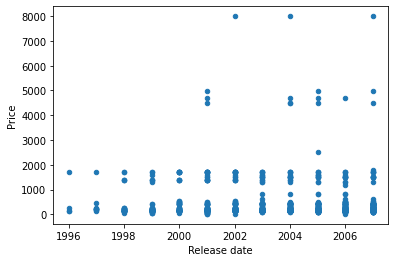

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
count,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,2003.596712,2475.640232,1777.054159,4.597679,32.945841,121.558994,44.103482,7.762089,17.473888,319.070600,105.322534,458.461315
std,2.713636,757.869119,828.777042,2.839807,10.348851,93.634120,24.173180,8.045699,27.460819,260.624345,24.228776,761.726099
min,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,2002.000000,2048.000000,1120.000000,3.000000,35.000000,96.000000,30.000000,3.000000,8.000000,180.000000,92.000000,149.000000
50%,2004.000000,2560.000000,2048.000000,4.000000,36.000000,108.000000,50.000000,6.000000,16.000000,225.500000,101.000000,199.000000
75%,2006.000000,3072.000000,2560.000000,7.000000,38.000000,117.000000,60.000000,10.000000,20.000000,340.000000,115.000000,399.000000
max,2007.000000,5616.000000,4992.000000,21.000000,52.000000,518.000000,120.000000,85.000000,450.000000,1860.000000,240.000000,7999.000000


In [43]:
print(camera_sorted.shape)
print(camera_new.columns)


columns_without_price_date_model = []


for column in camera_new.columns :
        if column != "Release date" and column != "Price" and column != "Model":
            columns_without_price_date_model.append(column)

  
camera_sorted.plot(x = "Release date", y = "Price", kind = "scatter")


plt.show()

#camera_new.head()

camera_new.describe()



As the price ranges differs a lot and has no clear trend, we are going to look at the properties of different cameras and how they might relate to price. It seems that there are a few very expensive cameras, it would also be interesting to know how the median of camera price developed over time.
When looking on the columns of the dataset, we can see that there are 13 columns. In the following I am going to shortly summarize the meaning of these columns : 
- Model: name of the model of the camera
- Release date: date of release of the camera
- Max resolution: highest dimension in pixel
- Low resolution: lowest dimensions in pixel
- Effective pixels:  is a measurement of the number of pixels that actively record the photographic image within a sensor. As an example, a camera might hold a sensor containing 10.5 megapixels, but they have an effective pixel count of 10.2 megapixels.
- Zoom wide (W): zoom wide refers to the ability of a camera to zoom into width. The data refers to the size of the lens in mm.
- Zoom tele (T): zoom tele refers to the length of the lens and its ability to zoom into distance. The data refers to the size of the lens in mm.
- Normal focus range: A “normal” lens is one whose focal length is the diagonal of the sensor of the camera. So 
- Macro focus range: is the nearest distance between the camera and the subject such that the camera can take clear and in-focus shots
- Storage included Local camera storage included
- Weight (inc.batteries) weight of the camera including bateries
- Dimensions Length and width of the camera
- Price


Release date
1994      1
1995      1
1996      4
1997     10
1998     31
1999     53
2000     61
2001     85
2002     89
2003    101
2004    141
2005    143
2006    152
2007    162
Name: Model, dtype: int64


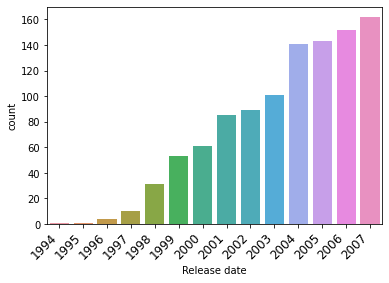

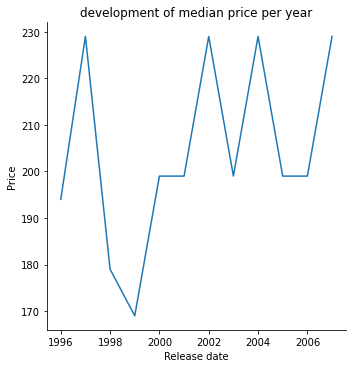

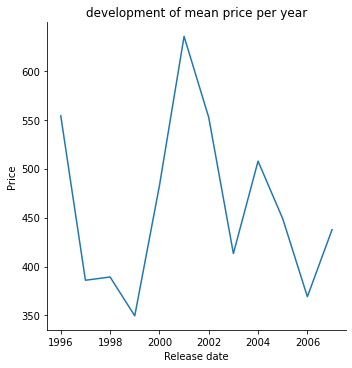

In [3]:
#print how many models per year the dataset has
camera_new_grouped_bydate_copy = camera_new.groupby("Release date")["Model"].count()

print(camera_new_grouped_bydate_copy)

#making barplot from number of cameras per year
countplot = sns.countplot(x = "Release date", data = camera_new)
countplot.set_xticklabels(countplot.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')



#median and mean of price over time
mean_camera = camera_sorted.groupby("Release date").mean()

median_camera = camera_sorted.groupby("Release date").median()

sns.relplot(x = "Release date", y = "Price", data = median_camera, kind = "line")
plt.title("development of median price per year")

sns.relplot(x = "Release date", y = "Price", data = mean_camera, kind = "line")
plt.title("development of mean price per year")

plt.show()

In the countplot we can clearly see, that there are a lot more cameras in the dataset in the later years than in the earlier years. If that comes from the method of data collection or from the fact that there were less cameras released in the 1990's is not clear. It is definitely important to keep this fact in mind as we proceed with our analysis, as it can affect later results. Now we are going to look at the different camera properties and how they have developed over time. 

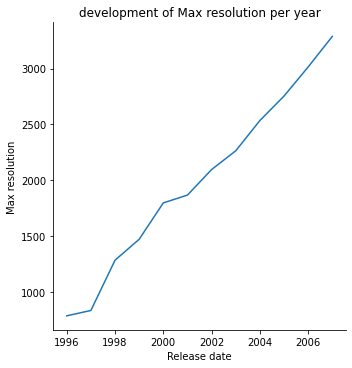

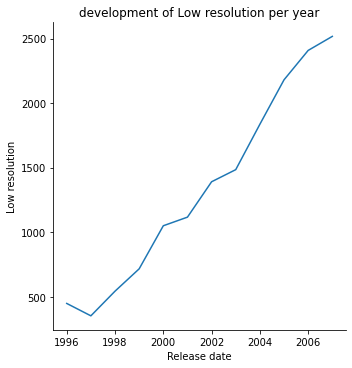

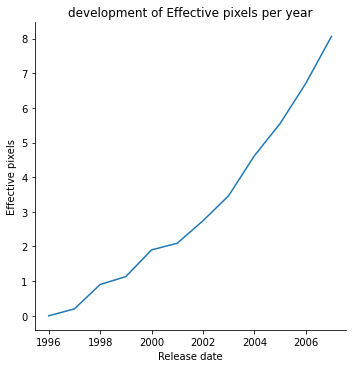

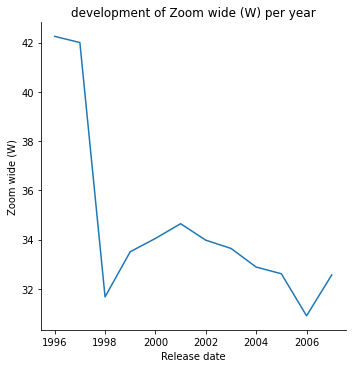

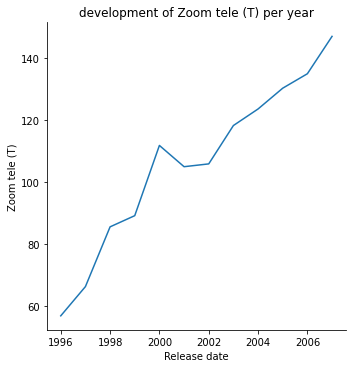

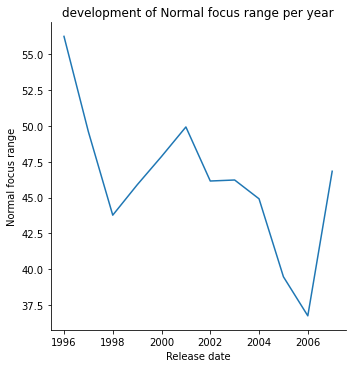

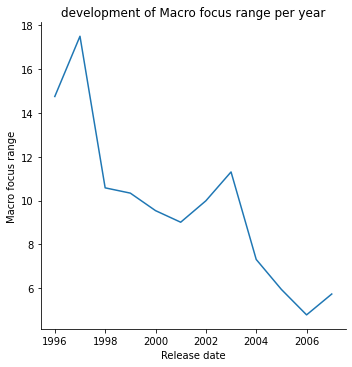

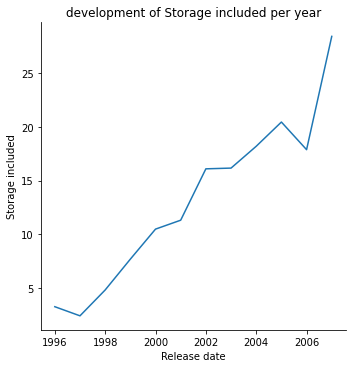

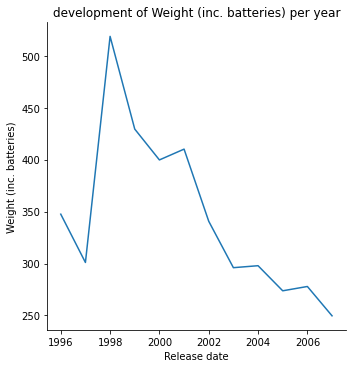

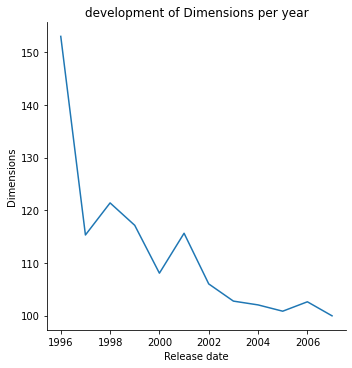

In [4]:
#different properties 

# sns.relplot(x = "Release date", y = "Effective pixels", data = mean_camera, kind = "line")
# plt.title("development of pixels per year")

for properties in columns_without_price_date_model :
    sns.relplot(x = "Release date", y = f"{properties}", data = mean_camera, kind = "line")
    plt.title(f"development of {properties} per year")
    plt.show


Now we are going to check if there is a linear relationship between the different properties and the price of a camera.

The lowest price is 14.0
The lowest price is 7999.0
The mean price is 459.0998062015504
The median price is 199.0
The standard deviation price is 762.3262033221365


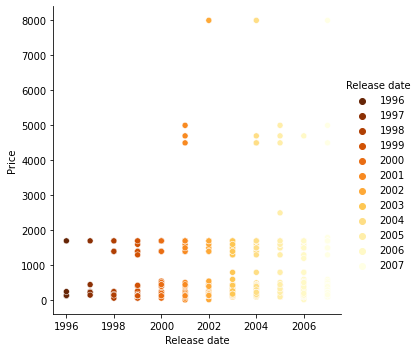

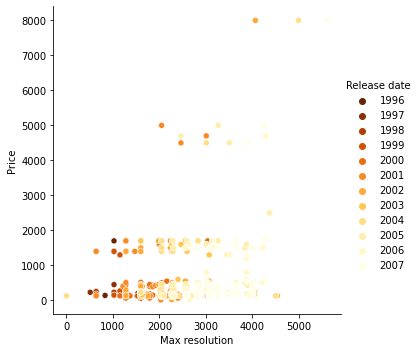

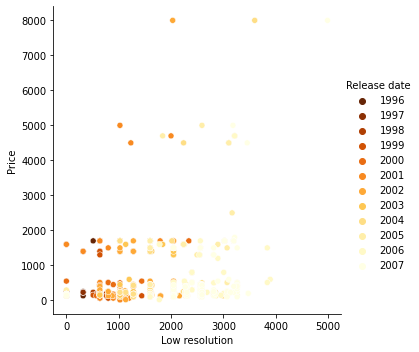

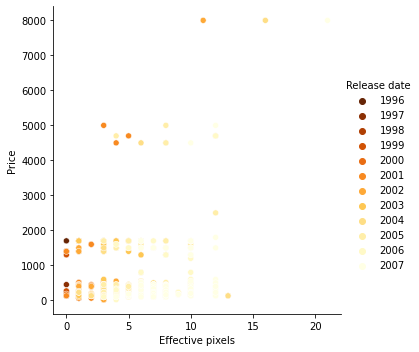

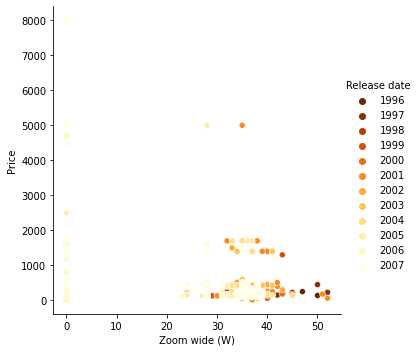

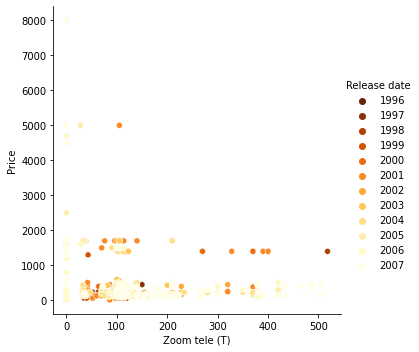

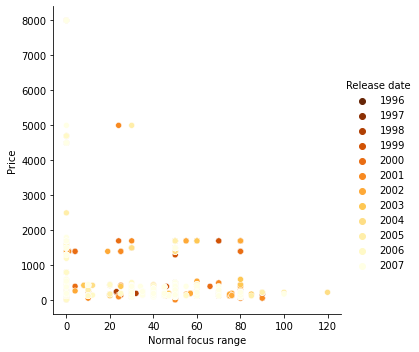

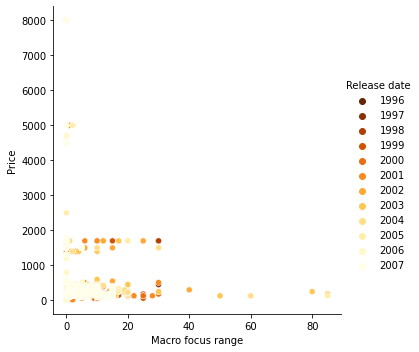

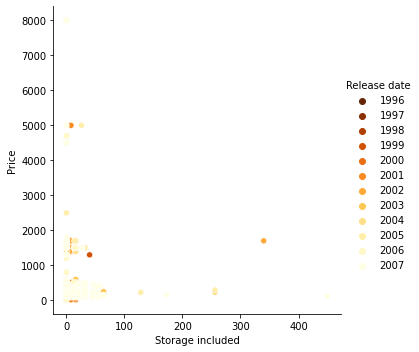

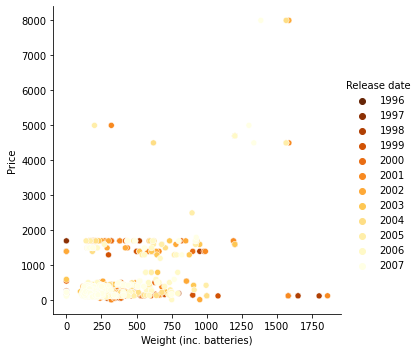

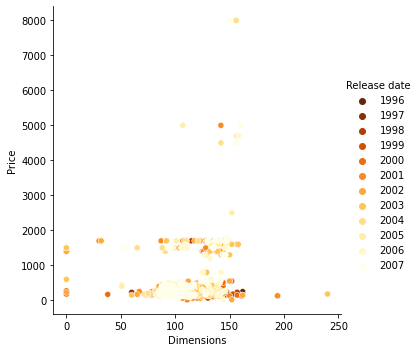

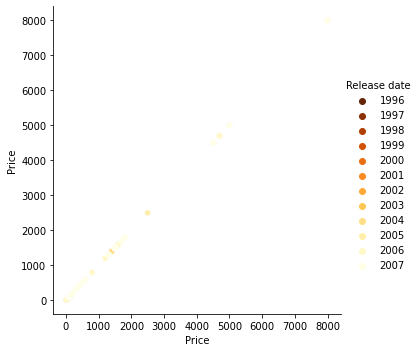

In [35]:
#list with columns
columns_without_model = []

#look at the highest and the lowest price
min_price_camera = camera_sorted["Price"].min()
max_price_camera= camera_sorted["Price"].max()
mean_price_camera = camera_sorted["Price"].mean()
median_price_camera = camera_sorted["Price"].median()
std_price_camera = camera_sorted["Price"].std()

print(f"The lowest price is {min_price_camera}")
print(f"The lowest price is {max_price_camera}")
print(f"The mean price is {mean_price_camera}")
print(f"The median price is {median_price_camera}")
print(f"The standard deviation price is {std_price_camera}")

#exclude columns release date and model
for column in camera_sorted.columns :
        if column != "Model":
            columns_without_model.append(column)


for properties in columns_without_model :

    sns.relplot(x = f"{properties}" , y = "Price", data = camera_sorted, kind = "scatter", hue = "Release date", legend='full', palette = "YlOrBr_r")
    plt.show

Interestingly the scatterplots seem to have similar patterns. There are a some extreme outliers though for datapoints that have a price above 2000. 

In order to perform a multiple linear regression the following assumptions must hold:
-Linear relationship
-Multivariate normality
-No or little multicollinearity
-No auto-correlation
-Homoscedasticity

Applying a multiple linear Regression gives the following.

first we check whether the data is gaussian distributed. 

if there the data is very heteroscedastic ( gap between 750 and 1250 price) we could perform wls (weighted least square regression)

/var/folders/ld/36b_mxhn7rsfrn433vqc3ypr0000gn/T/ipykernel_12241/2023193594.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  camera_sorted_without_release = camera_sorted.drop("Release date", 1)


Model                       object
Max resolution             float64
Low resolution             float64
Effective pixels           float64
Zoom wide (W)              float64
Zoom tele (T)              float64
Normal focus range         float64
Macro focus range          float64
Storage included           float64
Weight (inc. batteries)    float64
Dimensions                 float64
Price                      float64
dtype: object


TypeError: '<' not supported between instances of 'float' and 'str'

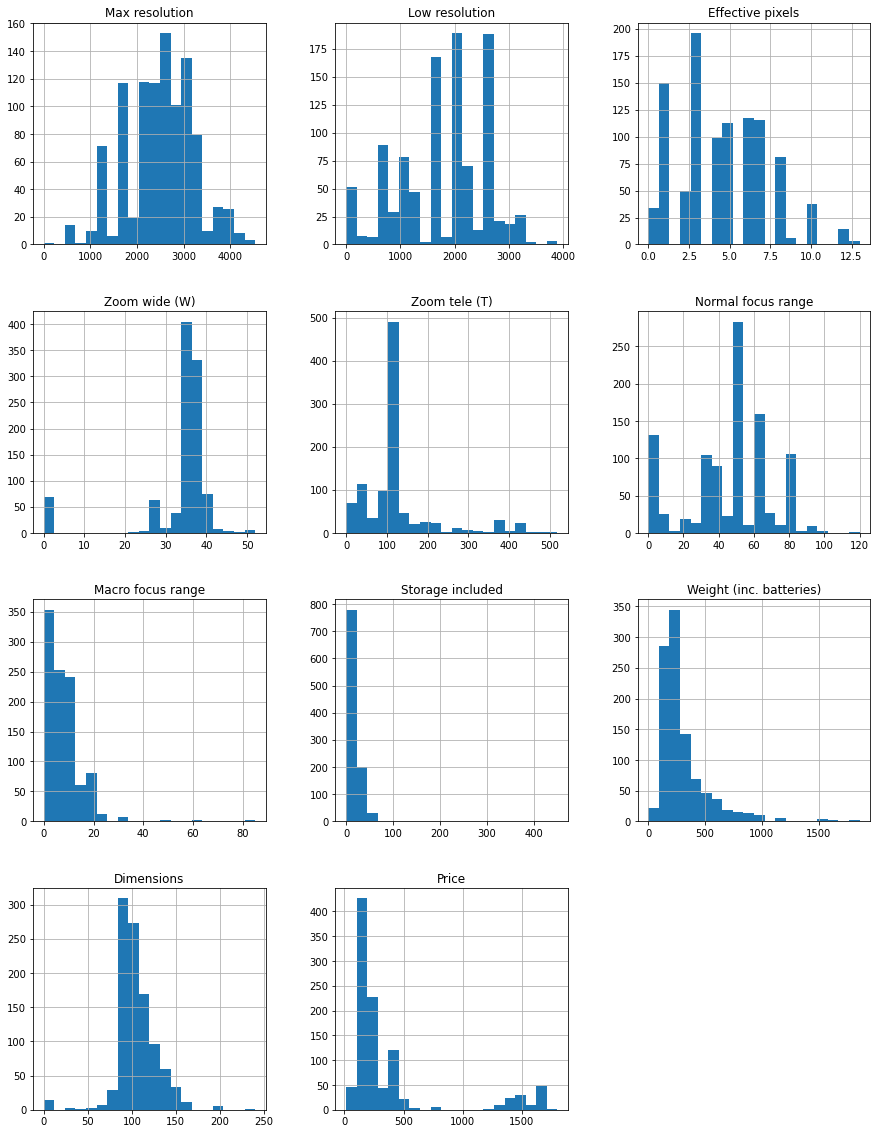

In [20]:
#take out release date
camera_sorted_without_release = camera_sorted.drop("Release date", 1)

#take out rows with price bigger than 2000
camera_sorted_without_release = camera_sorted_without_release[camera_sorted_without_release['Price'] <= 2000]  

print(camera_sorted_without_release.dtypes)

# Plot the histograms
camera_sorted_without_release.hist(bins = 20, figsize = (15,20))


# q-q plot
#qqplot(camera_sorted_without_release, line='s')


array([[<AxesSubplot:xlabel='Max resolution', ylabel='Max resolution'>,
        <AxesSubplot:xlabel='Low resolution', ylabel='Max resolution'>,
        <AxesSubplot:xlabel='Effective pixels', ylabel='Max resolution'>,
        <AxesSubplot:xlabel='Zoom wide (W)', ylabel='Max resolution'>,
        <AxesSubplot:xlabel='Zoom tele (T)', ylabel='Max resolution'>,
        <AxesSubplot:xlabel='Normal focus range', ylabel='Max resolution'>,
        <AxesSubplot:xlabel='Macro focus range', ylabel='Max resolution'>,
        <AxesSubplot:xlabel='Storage included', ylabel='Max resolution'>,
        <AxesSubplot:xlabel='Weight (inc. batteries)', ylabel='Max resolution'>,
        <AxesSubplot:xlabel='Dimensions', ylabel='Max resolution'>,
        <AxesSubplot:xlabel='Price', ylabel='Max resolution'>],
       [<AxesSubplot:xlabel='Max resolution', ylabel='Low resolution'>,
        <AxesSubplot:xlabel='Low resolution', ylabel='Low resolution'>,
        <AxesSubplot:xlabel='Effective pixels', ylabel='Lo

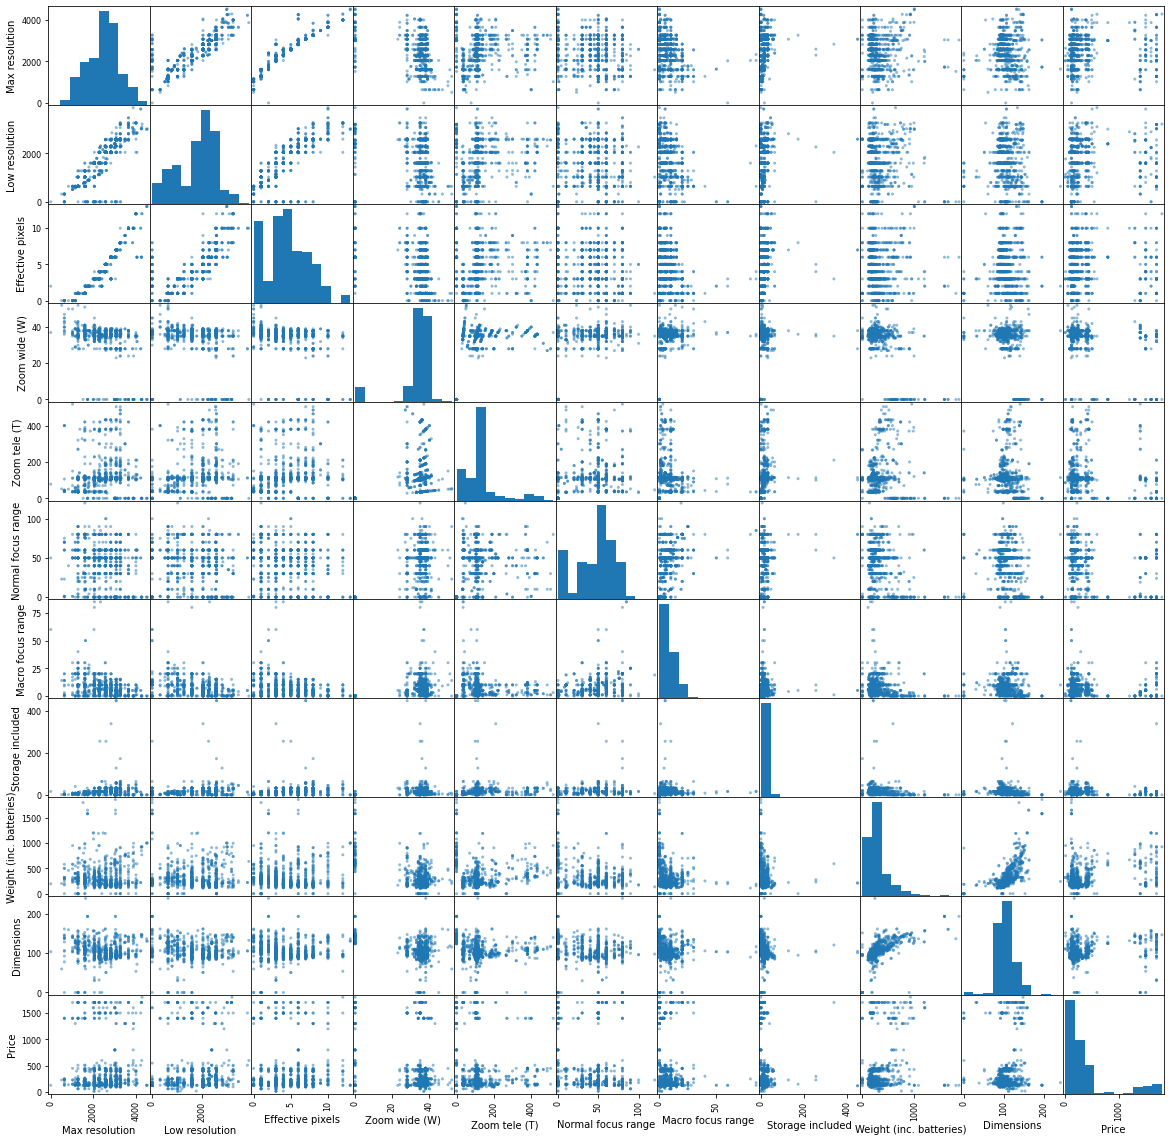

In [42]:
pd.plotting.scatter_matrix(camera_sorted_without_release, figsize = (20,20))